# File Upload

In [1]:
from google.colab import files


uploaded = files.upload()
for f in uploaded.keys():
    print('User iploaded file "{name}" with length {length} bytes'.format(name = f, length = len(uploaded[f])))

Saving data_hw1.csv to data_hw1.csv
User iploaded file "data_hw1.csv" with length 25845 bytes


# Task 1

## Model: $y = ax + b$
## Approach: Gradient Descent

## 1. Read the .csv file and store the data into the dataframe 

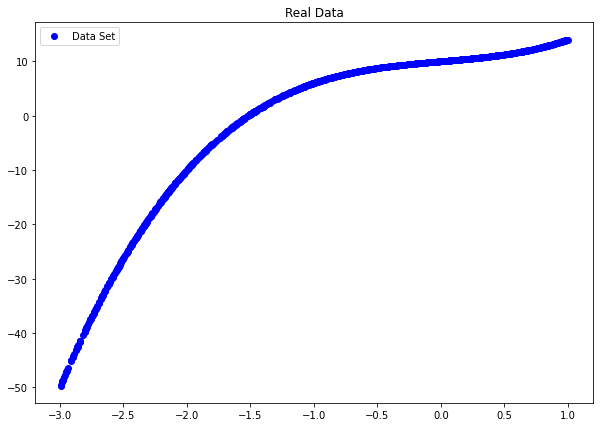

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
plt.title("Real Data")

data = pd.read_csv("./data_hw1.csv").sort_values(by='x', axis=0)
plt.plot(data['x'], data['y'], 'bo', label="Data Set")
plt.legend()
plt.show()

## 2. Define the Initializer and Prediction

In [3]:
import numpy as np


# w -> weight
w = np.random.uniform(low=-1.0, high=1.0)

# b -> bias
b = np.random.uniform(low=data['y'].min(), high=data['y'].max())

# p -> prediction
p = w * data['x'].to_numpy() + b

## 3. Define the Error -> MSE (Mean Squared Error)

In [4]:
# e -> error
e = ((p - data['y'].to_numpy()) ** 2).mean()

## 4. Train the built model

In [15]:
# epoch
num_epoch = 5000

# learning rate
learning_rate = 0.1

# x and y axis
x = data['x'].to_numpy()
y = data['y'].to_numpy()

# train
errors = []
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=data['y'].min(), high=data['y'].max())

for epoch in range(1, num_epoch + 1):
    p = w * x + b
    e = ((p - y) ** 2).mean()
    if e < 0.0005: break

    w = w - learning_rate * ((p - y) * x).mean()
    b = b - learning_rate * (p - y).mean()

    errors.append(e)

    if epoch % 5 == 0: 
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, e))


print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}\n".format(epoch, w, b, e))

 5 w = 8.97214, b = 9.23923 error = 82.66103
10 w = 10.85981, b = 8.87649 error = 55.21955
15 w = 11.41153, b = 9.09991 error = 53.20181
20 w = 11.65276, b = 9.37847 error = 52.59332
25 w = 11.80214, b = 9.61736 error = 52.24867
30 w = 11.91076, b = 9.80827 error = 52.03970
35 w = 11.99392, b = 9.95822 error = 51.91238
40 w = 12.05850, b = 10.07548 error = 51.83477
45 w = 12.10886, b = 10.16706 error = 51.78746
50 w = 12.14816, b = 10.23857 error = 51.75862
55 w = 12.17883, b = 10.29441 error = 51.74105
60 w = 12.20279, b = 10.33800 error = 51.73033
65 w = 12.22149, b = 10.37203 error = 51.72380
70 w = 12.23609, b = 10.39860 error = 51.71982
75 w = 12.24748, b = 10.41935 error = 51.71740
80 w = 12.25638, b = 10.43554 error = 51.71592
85 w = 12.26333, b = 10.44819 error = 51.71502
90 w = 12.26875, b = 10.45806 error = 51.71447
95 w = 12.27299, b = 10.46577 error = 51.71413
100 w = 12.27630, b = 10.47178 error = 51.71393
105 w = 12.27888, b = 10.47648 error = 51.71380
110 w = 12.28089, b

## 5. Visualization of the Results

### 5-1. Error

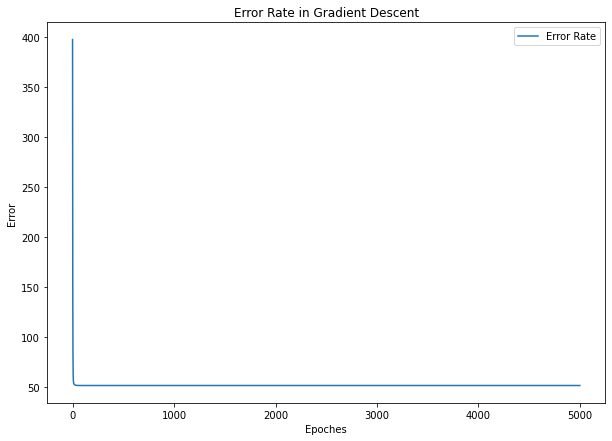

In [16]:
plt.figure(figsize=(10, 7))
plt.title("Error Rate in Gradient Descent")
plt.xlabel('Epoches')
plt.ylabel('Error')
plt.plot(errors, label="Error Rate")
plt.legend()
plt.show()

### 5-2. Prediction

Result: 12.288069059865078 * x + 10.493209154984212
Error: 51.713608634301416



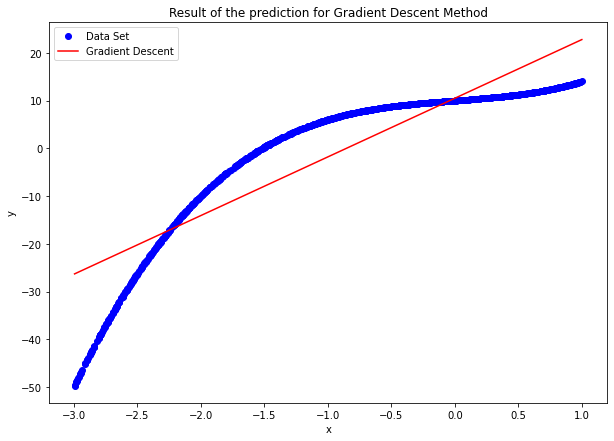

In [17]:
# Result of the prediction function
print(f"Result: {w} * x + {b}")
print(f"Error: {e}\n")

# Result of the prediction
plt.figure(figsize=(10, 7))
plt.title("Result of the prediction for Gradient Descent Method")
plt.plot(data['x'], data['y'], 'bo', label="Data Set")
plt.plot(x, p, 'r', label="Gradient Descent")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 5-3. Comparison to the Built-In Model

Result: 12.28806905986509 * x + 10.49320915498423
Error: 51.7136086343014



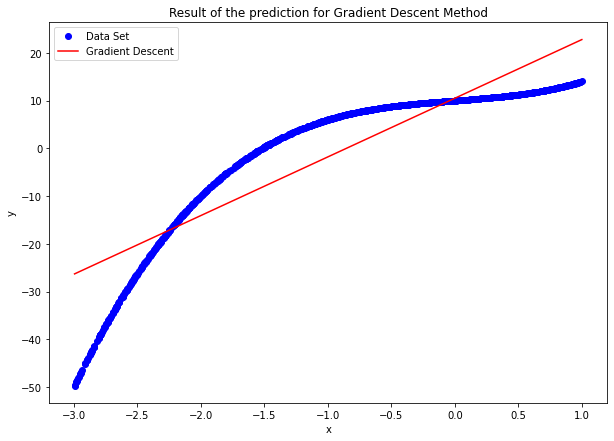

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


# model initialization
model = LinearRegression().fit(x.reshape((-1, 1)), y)

# predict response
p = model.predict(x.reshape((-1, 1)))
print(f"Result: {float(model.coef_)} * x + {model.intercept_}")
print(f"Error: {mean_squared_error(y, p)}\n")

# Result of the model
plt.figure(figsize=(10, 7))
plt.title("Result of the prediction for Gradient Descent Method")
plt.plot(data['x'], data['y'], 'bo', label="Data Set")
plt.plot(x, p, 'r', label="Gradient Descent")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Task 2

## Model: $y = ax^2 + bx + c$
## Approach: Normal Equation

## 1. Read the .csv file and store the data into the dataframe

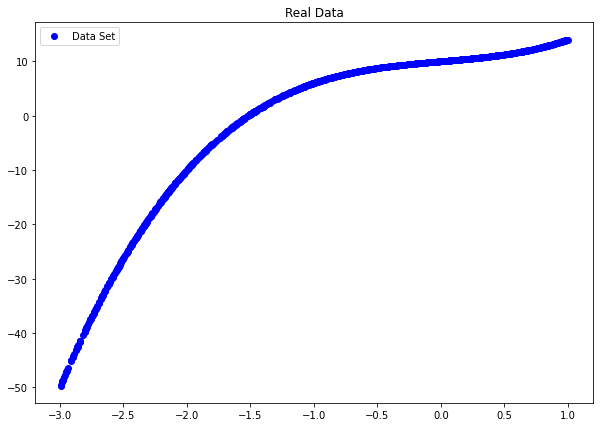

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
plt.title("Real Data")

data = pd.read_csv("./data_hw1.csv").sort_values(by='x', axis=0)
plt.plot(data['x'], data['y'], 'bo', label="Data Set")
plt.legend()
plt.show()

## 2. Define the Matrices that are used in the Normal Equation

In [10]:
import numpy as np


# real data of x and y axis
x = data['x'].to_numpy()
y = data['y'].to_numpy()
x1 = x.reshape((len(x), 1))

# x2 -> x power of 2
# bias_x -> bias of x
x2 = np.power(x1, 2)
x_bias = np.ones((len(x1), 1))

# marix_x -> x axis with bias which is in the matrix form
matrix_x = np.append(x_bias, x1, axis=1)
matrix_x = np.append(matrix_x, x2, axis=1)

# tanspose_x -> transposed matrix of the following x matrix
# tx_dot_mx -> dot operation between transposed matrix and original matrix
transpose_x = np.transpose(matrix_x)
tx_dot_mx = transpose_x.dot(matrix_x)

# inverse_x -> inveres matrix of the following x matrix
inverse_x = np.linalg.inv(tx_dot_mx)

# mx_dot_y -> dot operation between x matrix and y matrix
mx_dot_y = transpose_x.dot(y)

# theta -> coefficients of the prediction graph
theta = inverse_x.dot(mx_dot_y)

## 3. Define the Prediction based on the result from Normal Equation

In [11]:
x1= data['x'].to_numpy()
x2 = np.power(x1, 2)

# p -> prediction
p = theta[0] + theta[1]*x1 + theta[2]*x2

## 4. Define the Error -> MSE (Mean Squared Error) 

In [12]:
# e -> error
e = ((p - y) ** 2).mean()

## 5. Visualization of the Results

### 5-1. Prediction

Result: -5.82074893158833 * x**2 + 1.0570819678946108 * x + 12.704822547462781
Error: 5.496605324334822



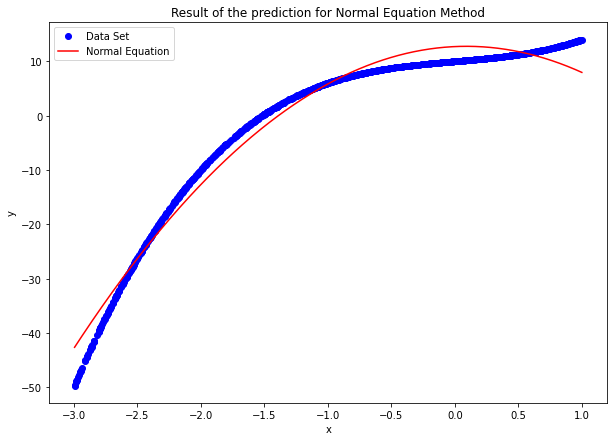

In [13]:
# Result of the polynomial function
print(f"Result: {theta[2]} * x**2 + {theta[1]} * x + {theta[0]}")
print(f"Error: {e}\n")

# Result of the prediction
plt.figure(figsize=(10, 7))
plt.title("Result of the prediction for Normal Equation Method")
plt.plot(data['x'], data['y'], 'bo', label="Data Set")
plt.plot(x, p, 'r', label="Normal Equation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 5-2. Comparison to the Built-In Model

Result: -5.8207489315883265 * x**2 + 1.0570819678946002 * x + 12.704822547462763
Error: 5.496605324334822



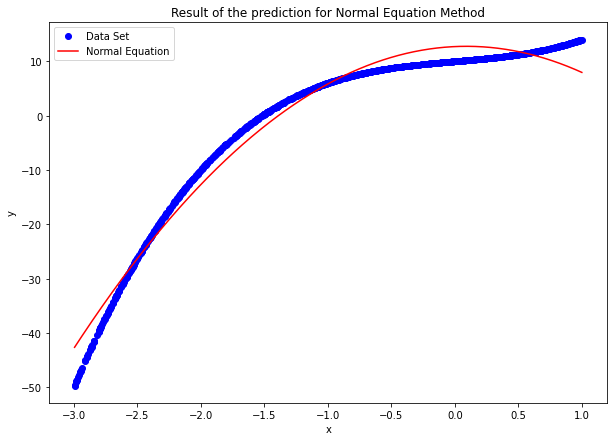

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# data
x = data['x'].to_numpy()
y = data['y'].to_numpy()

# model initialization
x = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x.reshape((-1, 1)))
model = LinearRegression().fit(x, y)

# predict response
p = model.predict(x)
print(f"Result: {model.coef_[2]} * x**2 + {model.coef_[1]} * x + {model.intercept_}")
print(f"Error: {mean_squared_error(y, p)}\n")

# Result of the model
plt.figure(figsize=(10, 7))
plt.title("Result of the prediction for Normal Equation Method")
plt.plot(data['x'], data['y'], 'bo', label="Data Set")
plt.plot(data['x'].to_numpy(), p, 'r', label="Normal Equation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()